# Восстановление золота из руды. Описание проекта.

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# Подготовка данных

## Загрузка данных и получение информации о них.

Импортируем необходимые для нашей работы библиотеки.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import GridspecLayout

import warnings
warnings.filterwarnings('ignore')

Загружаем данные.

In [ ]:
train_df = pd.read_csv('/datasets/gold_industry_full.csv')
test_df = pd.read_csv('/datasets/gold_industry_test.csv')
full_df = pd.read_csv('/datasets/gold_industry_train.csv')

Посмотрим информацию о каждом из получившихся датасетов.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [ ]:
train_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [ ]:
train_df.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [ ]:
print(f'Количество дубликатов в датасете: {train_df.duplicated().sum()}')

Количество дубликатов в датасете: 0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [ ]:
test_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [ ]:
test_df.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [ ]:
print(f'Количество дубликатов в датасете: {test_df.duplicated().sum()}')

Количество дубликатов в датасете: 0


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [ ]:
full_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [ ]:
full_df.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [ ]:
print(f'Количество дубликатов в датасете: {full_df.duplicated().sum()}')

Количество дубликатов в датасете: 0


Видно следующее:

 - В датасетах есть пропуски.
 - В датасете с тестовыми данными отсуствует часть признаков, которые есть в датасете с обучающими данными.
 - Явных дубликатов в датасетах нет.

## Проверка значений эффективности обогащения.

Проверим формулу вычисления эффективности обогащения. Она имеет вид:


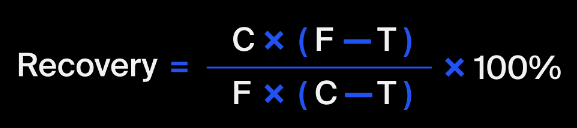

где:

C - доля золота в концентрате после флотации/очистки;

F - доля золота в сырье/концентрате до флотации/очистки;

T - доля золота в отвальных хвостах после флотации/очистки.

Напишем функцию для расчёта и применим на наших тестовых данных. Далее выведем информацию о расчётных данных.

In [ ]:
def recovery_calc(C, F, T):
    return ((C*(F-T))/(F*(C-T)))*100

In [ ]:
recovery = recovery_calc(
    train_df['rougher.output.concentrate_au'],
    train_df['rougher.input.feed_au'],
    train_df['rougher.output.tail_au'],
)
recovery = pd.Series(recovery)
recovery.describe()

count    19439.000000
mean        83.328587
std         14.148086
min         -0.000000
25%         81.037957
50%         86.188892
75%         90.010670
max        100.000000
dtype: float64

Сравним наши расчётные значения с заданным в датасете, основываясь на средней абсолютной ошибке (MAE).

In [ ]:
mae_recovery = mean_absolute_error(recovery.dropna(),train_df['rougher.output.recovery'].dropna())
print('MAE =', mae_recovery)

MAE = 9.871121473701021e-15


Значение MAE крайне мало, следовательно, эффективность обогащения в данных рассчитана верно.

## Поиск отсутствующих признаков и пропущенных значений.

Найдём отсутствующие в тестовых данных признаки и посмотрим, какой тип у их значений.

In [ ]:
missing_features = set(train_df.columns.to_list())-set(test_df.columns.to_list())
missing_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [ ]:
train_df[missing_features].dtypes

final.output.concentrate_sol                          float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.tail_sol                       float64
secondary_cleaner.output.tail_au                      float64
rougher.output.recovery                               float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.concentrate_sol                float64
final.output.tail_pb                                  float64
rougher.output.tail_sol                               float64
final.output.concentrate_au                           float64
rougher.output.concentrate_ag                         float64
secondary_cleaner.output.tail_sol                     float64
final.output.tail_sol                                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.concentrate_pb                         float64
rougher.

Мы видим, что:

 - Все значения отсутствующих признаков имеют одинаковый тип float64.
 - Часть отстутсвующих признаков имеют слово output в названии. Это целевые признаки.
 - Другая часть недостающих признаков имеют в своём названии слово calculation. Возможно, эти признаки считаются уже по результатам завершенного процесса.

Изучим датасеты на наличие пропусков.

In [ ]:
pd.DataFrame(
    round(
        train_df.isna().mean() * 100,
    )
).style.background_gradient("coolwarm")


,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,1.000000
rougher.input.feed_sol,1.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000


In [ ]:
pd.DataFrame(
    round(
        test_df.isna().mean() * 100,
    )
).style.background_gradient("coolwarm")

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,1.000000
rougher.input.feed_sol,0.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000


In [ ]:
pd.DataFrame(
    round(
        full_df.isna().mean() * 100,
    )
).style.background_gradient("coolwarm")

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,0.000000
rougher.input.feed_sol,1.000000
rougher.input.feed_rate,0.000000
rougher.input.feed_size,1.000000
rougher.input.floatbank10_sulfate,0.000000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000


Пропуски есть в тренировочном датасете (но не в целевых признаках), в тестовом они отсутствуют. В полном датасете пропусков в значениях целевых признаков также нет.

Добавим в тестовую информацию целевые показатели. До и после выведем размеры таблицы для проверки.

In [ ]:
print(test_df.shape)
test_df = test_df.merge(
    full_df[["date", "rougher.output.recovery", "final.output.recovery"]],
    how="left",
    on="date",
)
print(test_df.shape)

(4860, 53)
(4860, 55)


Как сказано в условии проекта, соседние по времени параметры часто похожи. Поэтому наилучшим считаю заполнение пропусков соответствующим методом.


In [ ]:
train_df.ffill(axis='rows', inplace=True)
test_df.ffill(axis='rows', inplace=True)
full_df.ffill(axis='rows', inplace=True)

## Выводы.

 - Загружены необходимые для работы библиотеки.
 - Загружены данные в виде трёх датасетов.
 - Рассмотрена информация о них.
 - Проведён расчёт эффективности обогащения, результат сравнен с соотвествующими значениями из данных. Значение MAE равно 9.73512347450521e-15, из чего сделан вывод, что заданные значения верны.
 - Выявлено, что в тестовом датасете отсутствуют целевые признаки и параметры, расчитывающиеся позже.
 - Целевые признаки возвращены в тестовый датасет.
 - Найдены пропуски в датасетах. Все они не касаются целевых признаков. Пропуски были заменены по методжу ffill.
 - Явные дубликаты в датасетах необнаружены.

# Анализ данных

## Исследование изменение концентрации элементов.

Необходимо исследовать, как меняется концентрация металлов Au (золото), Ag (серебро) , Pb (свинец) на различных этапах очистки. Для начала создаём списки с видами металлов и этапов.

In [ ]:
METALS_LIST = ['au', 'ag', 'pb']

STAGES_LIST = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate',
]

Строим гистограммы изменения концентрации металлов.

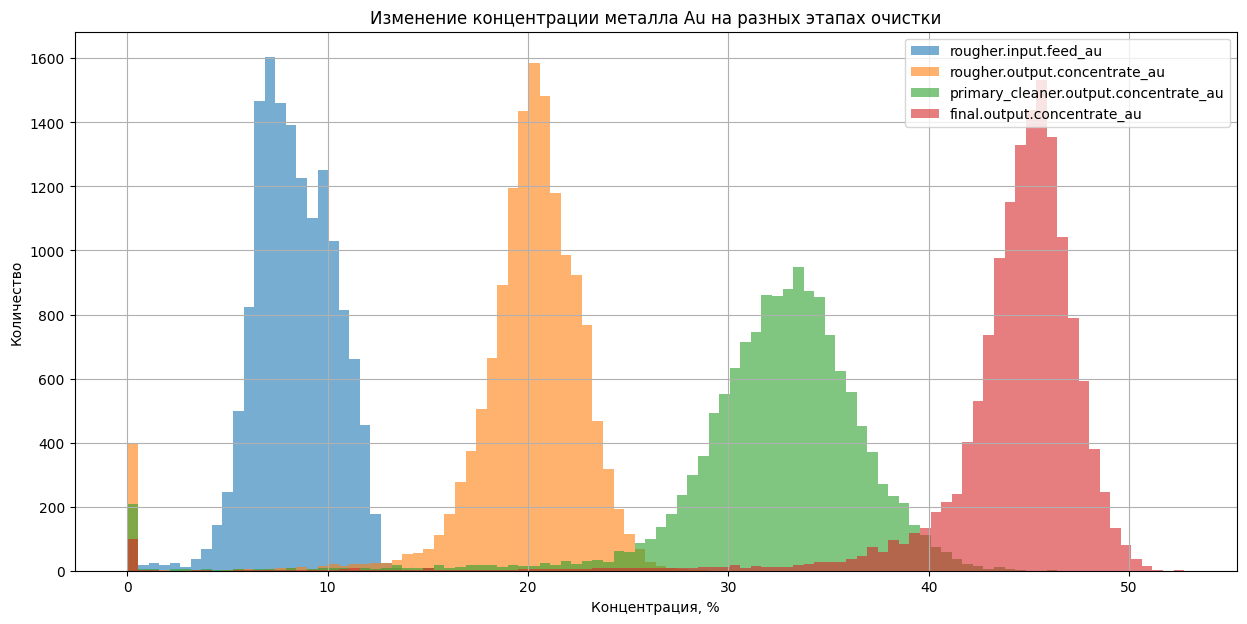

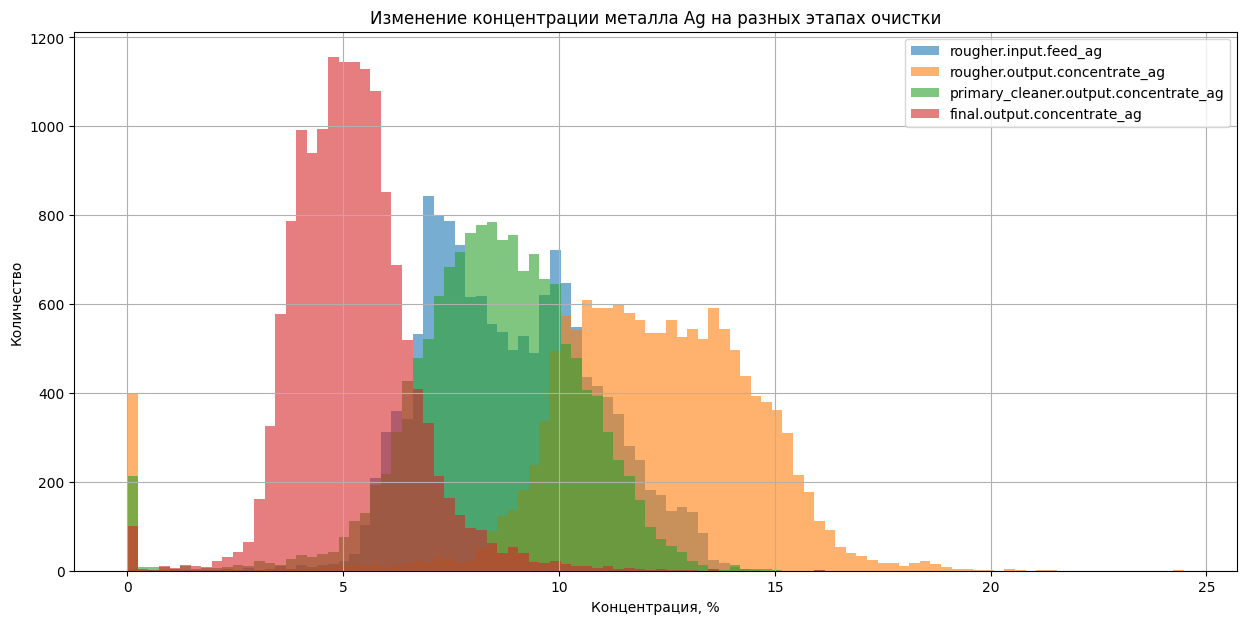

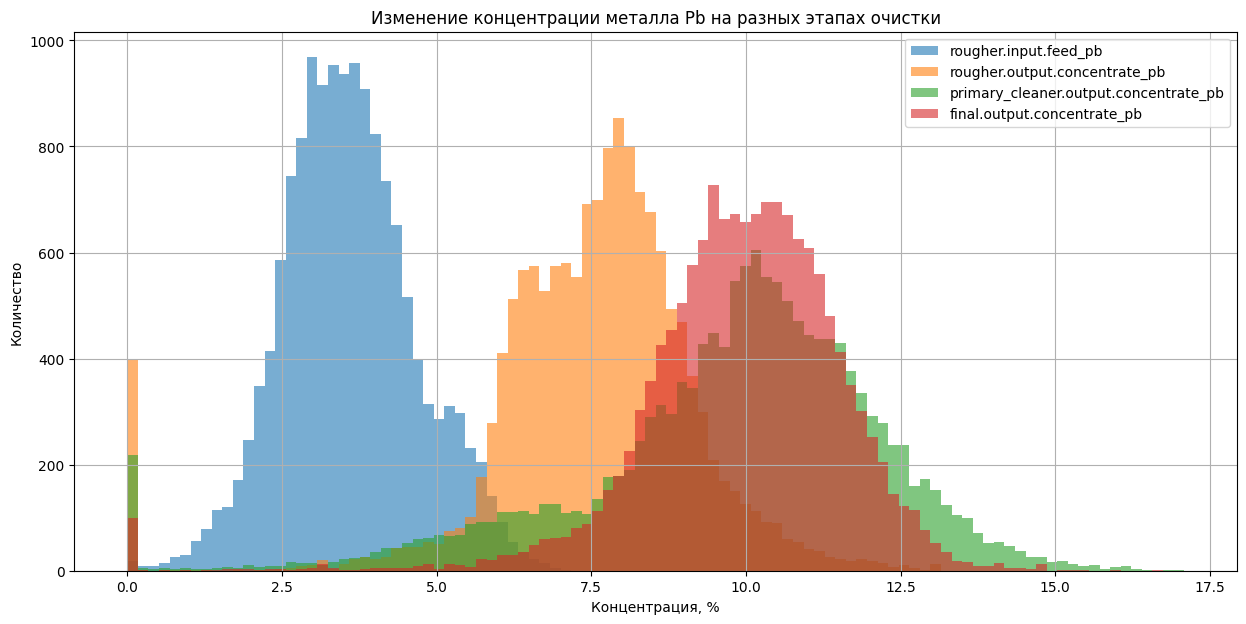

In [ ]:
for metal in METALS_LIST:
    stages = ["{}_{}".format(x, metal) for x in STAGES_LIST]

    full_df[stages].plot(
        title="Изменение концентрации металла {} на разных этапах очистки".format(
            metal.capitalize()
        ),
        kind="hist",
        bins=100,
        grid=True,
        legend=True,
        figsize=(15, 7),
        alpha=0.6,
    ).set(xlabel="Концентрация, %", ylabel="Количество")

    plt.show()


Построим в одной системе координат графики изменения концентрации всех трёх металлов относительно этапов очистки. Выведем средние значения концентрации каждого металла на каждом этапе очистки в таблицу.

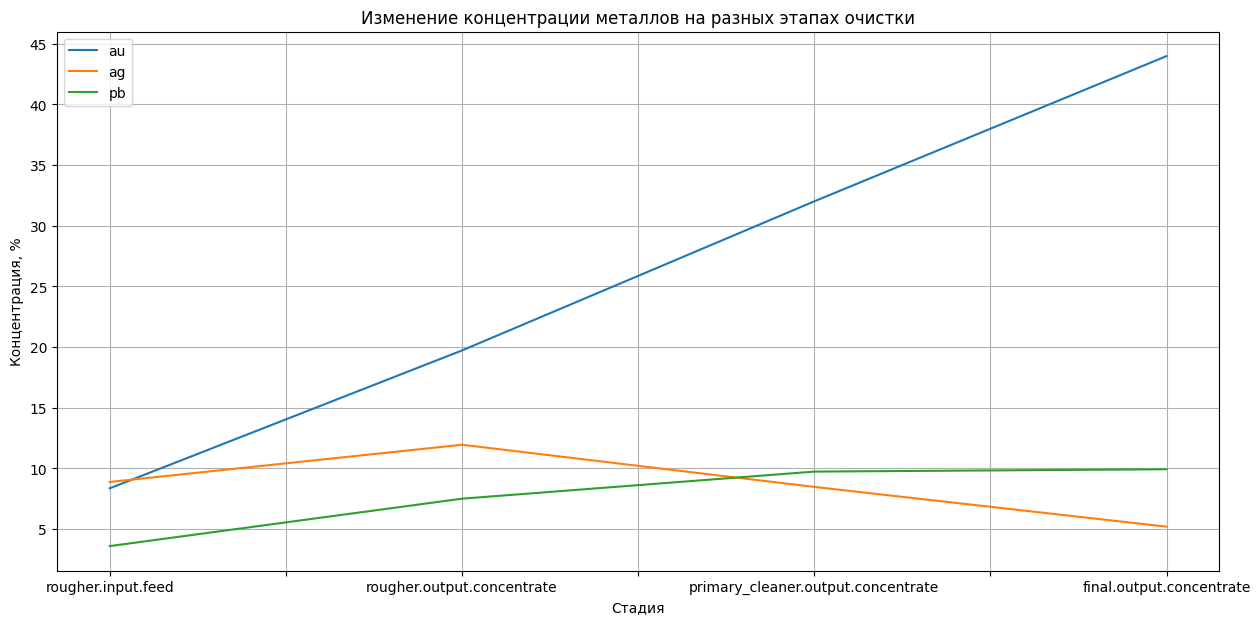

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
au,8.352941,19.71747,32.007535,43.979499
ag,8.87746,11.944253,8.468626,5.192032
pb,3.592094,7.498953,9.731606,9.923715


In [ ]:
metals_concentrate = pd.DataFrame(columns=STAGES_LIST)

for metal in METALS_LIST:
    for stage in STAGES_LIST:
        metals_concentrate.loc[metal, stage] = full_df[
            "{}_{}".format(stage, metal)
        ].mean()

for metal in METALS_LIST:
    metals_concentrate.loc[metal].plot(
        title="Изменение концентрации металлов на разных этапах очистки",
        grid=True,
        legend=True,
        figsize=(15, 7),
    ).set(xlabel="Стадия", ylabel="Концентрация, %")
plt.show()

display(metals_concentrate)

По графикам и средним показателям видно, что

 - Концентрация золота стабильно и сильно растёт.
 - Концентрация серебра растёт в течение первой стадии, а после начала второй начинает падать.
 - Концентрация свинца, как побочного элемента химической реакции, несильно, но растёт с первой по третью стадию, а дальше становится практически постоянной.

Построим график распределения плотности для сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

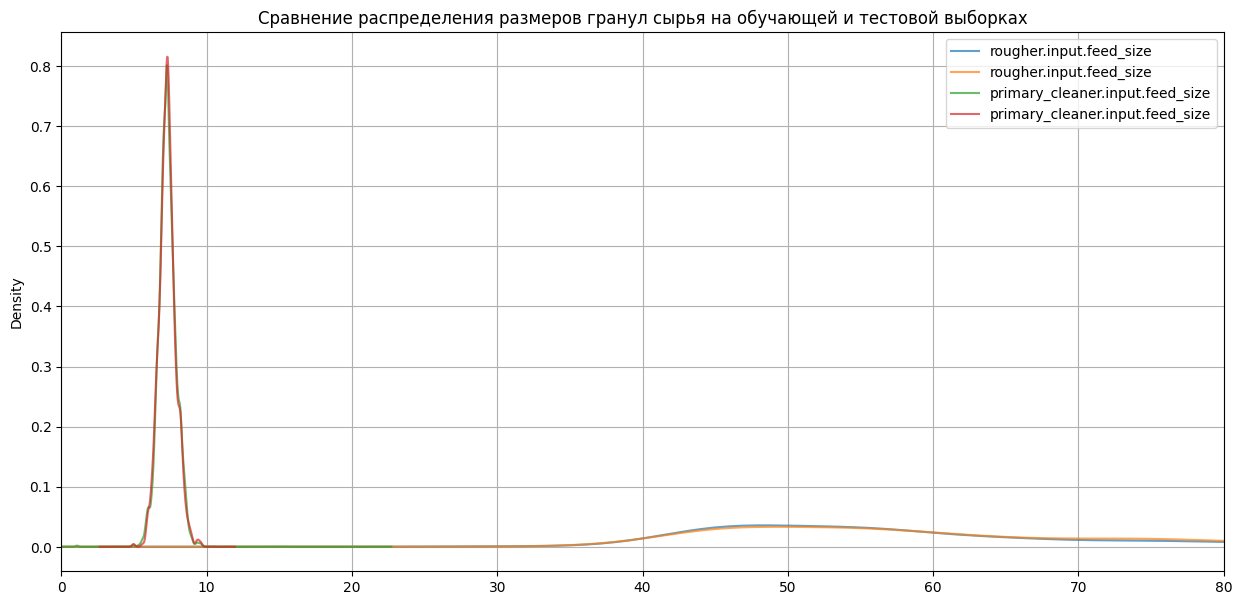

In [ ]:
for feed_sizes in ("rougher.input.feed_size", "primary_cleaner.input.feed_size"):
    for dataframe in [train_df, test_df]:
        dataframe[feed_sizes].plot.kde(
            figsize=(15, 7),
            xlim=(0, 80),
            grid=True,
            legend=True,
            alpha=0.7,
            title="Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках",
        )


Из гриафика видно, что распределение размеров гранул для тренировочной и тестовой выборки практически одинаковы.

## Исследование суммарной концентрации всех веществ в сырье, в черновом и финальном концентратах.

Посчитаем необходимые нам для каждого из трёх случаев суммарные концентрации веществ, взятые из тренировочной выборки, на которой будет обучаться модель, результаты занесём в список.

In [ ]:
sum_r_feed = train_df[['rougher.input.feed_ag',
                   'rougher.input.feed_pb',
                   'rougher.input.feed_sol',
                   'rougher.input.feed_au']].sum(axis=1)
sum_r_conc = train_df[['rougher.output.concentrate_pb',
                   'rougher.output.concentrate_ag',
                   'rougher.output.concentrate_sol',
                   'rougher.output.concentrate_au']].sum(axis=1)
sum_fin_conc = train_df[['final.output.concentrate_pb',
                   'final.output.concentrate_ag',
                   'final.output.concentrate_sol',
                   'final.output.concentrate_au']].sum(axis=1)
SUM_CONC = [sum_r_feed, sum_r_conc, sum_fin_conc]

На основе посчитанных суммарных концентраций построим гистограммы для сырья, чернового и финального концентратов соответственно. Кроме того, посмотрим посмотрим распределение данных так же с помощью describe() и построим ящики с усами.

count    19439.000000
mean        57.322230
std          7.209464
min          0.040000
25%         53.559598
50%         57.594391
75%         61.954409
max         76.978947
dtype: float64

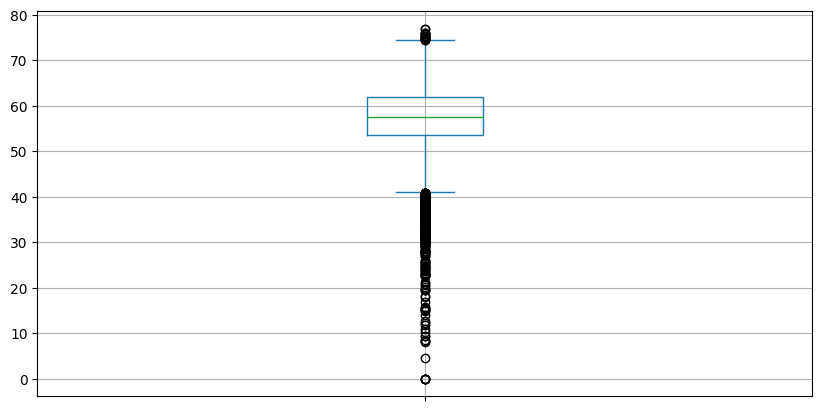

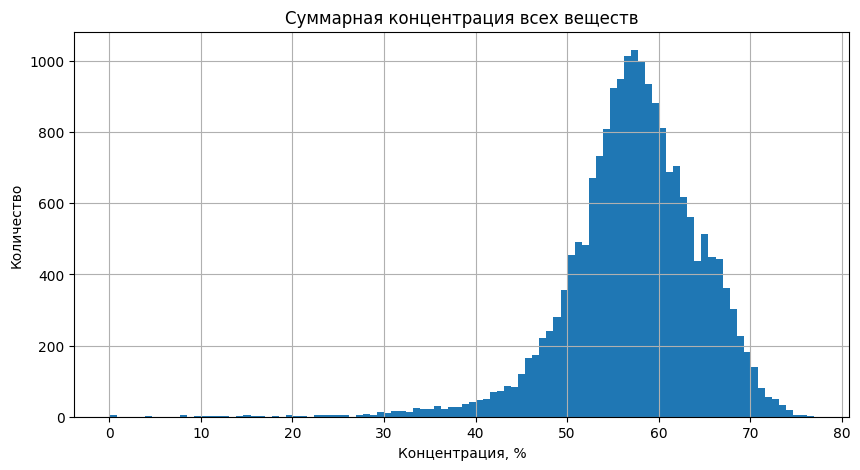

----------------


count    19439.000000
mean        68.171375
std         12.490476
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
dtype: float64

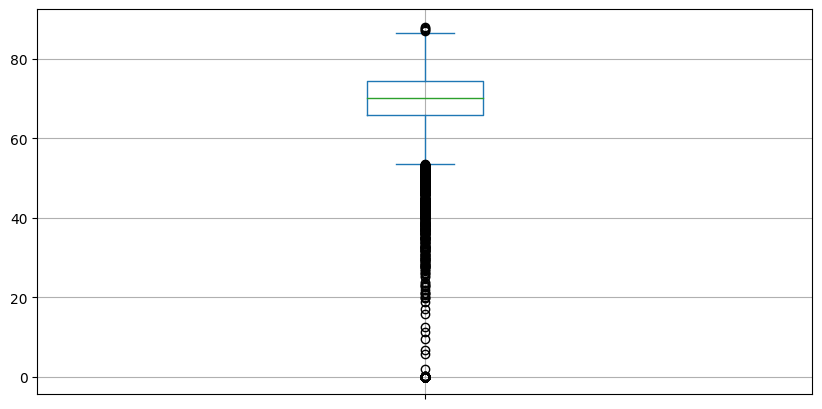

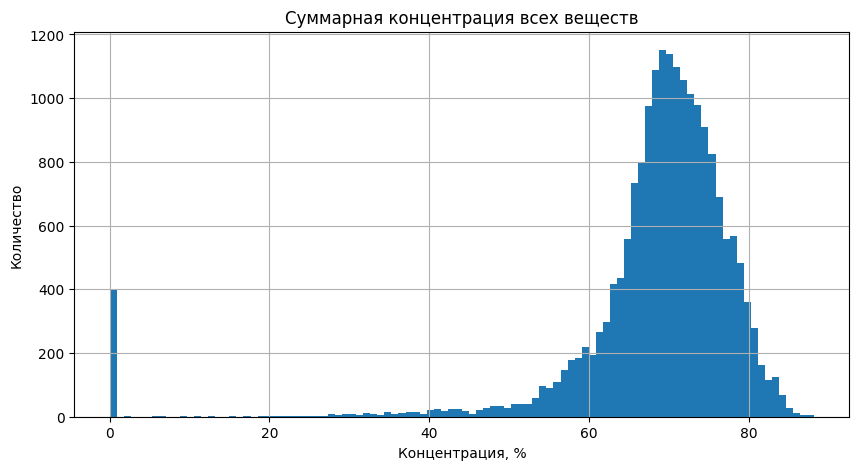

----------------


count    19439.000000
mean        68.654112
std          7.427434
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
dtype: float64

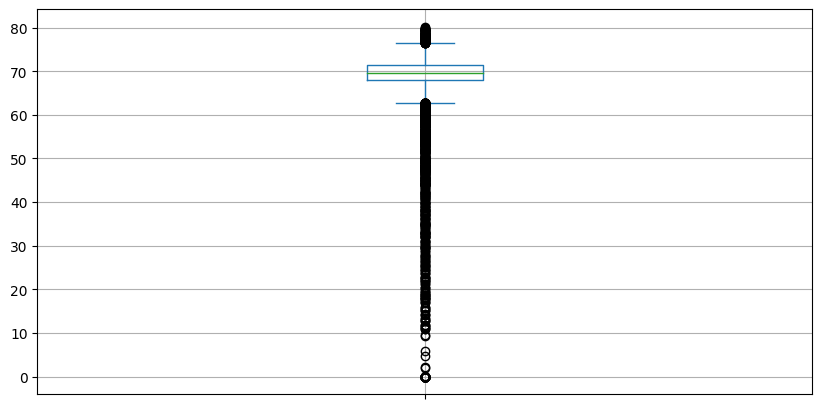

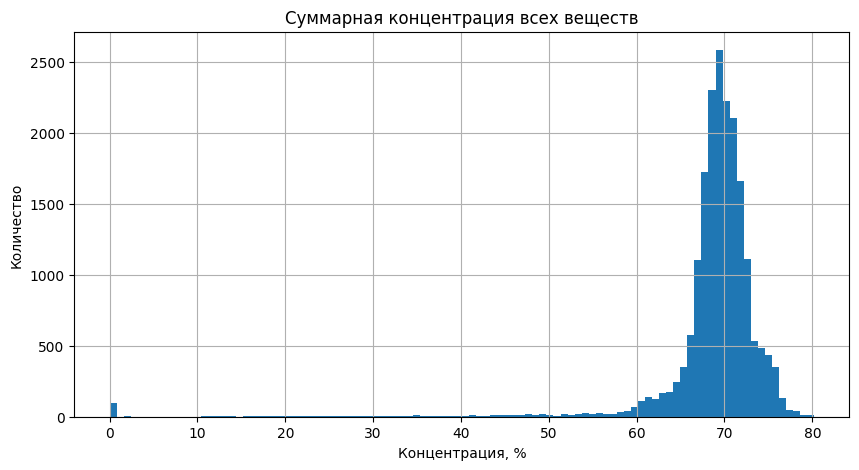

----------------


In [ ]:
for conc in SUM_CONC:
    display(conc.describe())
    conc.plot(kind='box',
              grid=True,
              figsize=(10, 5))
    plt.show()
    conc.plot(
                title = 'Cуммарная концентрация всех веществ',
                kind='hist',
                bins=100,
                grid=True,
                figsize=(10, 5),
            ).set(xlabel='Концентрация, %', ylabel='Количество')

    plt.show()
    print('----------------')

Во всех трёх случаях наблюдаем большое количество выбросов. Причиной их могут быть неисправность аппратуры, считывавшей показатели, ошибки при заполнении датасетов и т. д. Эти значения могут ухудшить показатели нашей будущей модели, считаю, что от них надо избавиться. Предполагаю, что выбросы в суммарных показателях-результат выбросов в отдельных показателях. Поэтому удалим их.


Теперь создадим список столбцов с нужными параметрами.

In [ ]:
COLUMNS_CLN = [
    "rougher.input.feed_ag",
    "rougher.input.feed_pb",
    "rougher.input.feed_sol",
    "rougher.input.feed_au",
    "rougher.output.concentrate_pb",
    "rougher.output.concentrate_ag",
    "rougher.output.concentrate_sol",
    "rougher.output.concentrate_au",
    "final.output.concentrate_pb",
    "final.output.concentrate_ag",
    "final.output.concentrate_sol",
    "final.output.concentrate_au"
]

Удалим все строки, показания в которых лежат за пределами верхней и нижней границ "усов".

In [ ]:
for col in COLUMNS_CLN:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3-q1
    min_value = q1 - 1.5*iqr
    max_value = q3 + 1.5*iqr
    train_df = train_df[(train_df[col] >= min_value) & (train_df[col] <= max_value)]

## Выводы.

 - Были исследовано изменение концентрации металлов относительно стадий очистки, выявлены закономерности для каждого из металлов.
 - Было произведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках, оно оказалось примерно одинаковым.
 - Проведено исследование суммарной концентрации всех веществ в сырье, в черновом и финальном концентратах, при котором было обнаружено большое количество выбросов, которые были удалены.

# Модель

## Подготовка выборок для моделей.

Сначала посмотрим, какие признаки, имеющиеся в тренировочной выборке, отсутствуют в тестовой. Они будут лишними для наших моделей.

In [ ]:
missing_test_fields = set(train_df.columns.to_list()) - set(test_df.columns.to_list())
print(missing_test_fields)

Удалим их из тренировочной выборки и сделаем проверку.

In [ ]:
train_df = train_df.drop(missing_test_fields, axis='columns')
missing_test_fields = set(train_df.columns.to_list()) - set(test_df.columns.to_list())
print(missing_test_fields)

Удалим из обеих выборок столбец с датой как неинформативный для нашей модели.

In [ ]:
train_df = train_df.drop(columns = ['date'],axis = 1)
test_df = test_df.drop(columns = ['date'],axis = 1)

Тренировочные данные очищены от лишних признаков.

Отделим фичи от целевых показателей.

In [ ]:
MODEL_TARGETS = ['rougher.output.recovery', 'final.output.recovery']
features_train = train_df.drop(MODEL_TARGETS, axis='columns')
target_train = train_df[MODEL_TARGETS]
features_test = test_df.drop(MODEL_TARGETS, axis='columns')
target_test = test_df[MODEL_TARGETS]

Проведём стандартизацию численных значений.

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Напишем функцию для подсчёта cимметричной средней абсолютной процентной ошибки (sMAPE).
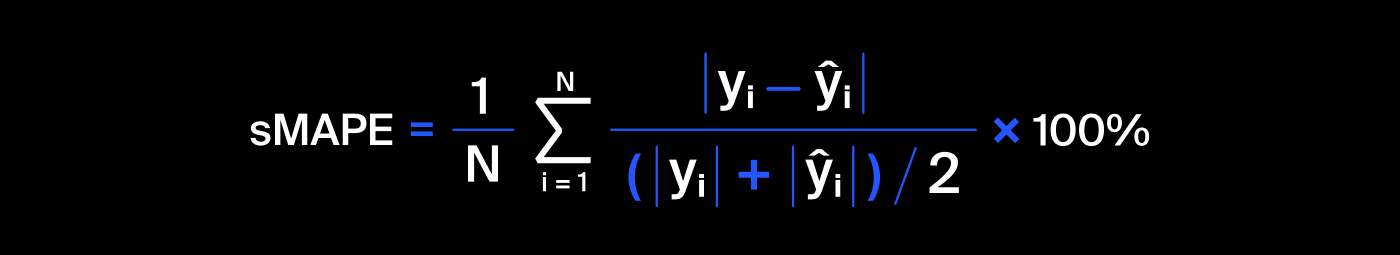

In [ ]:
def smape_calculate(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2

    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100

Также напишем функцию для подсчёта итоговой sMAPE.
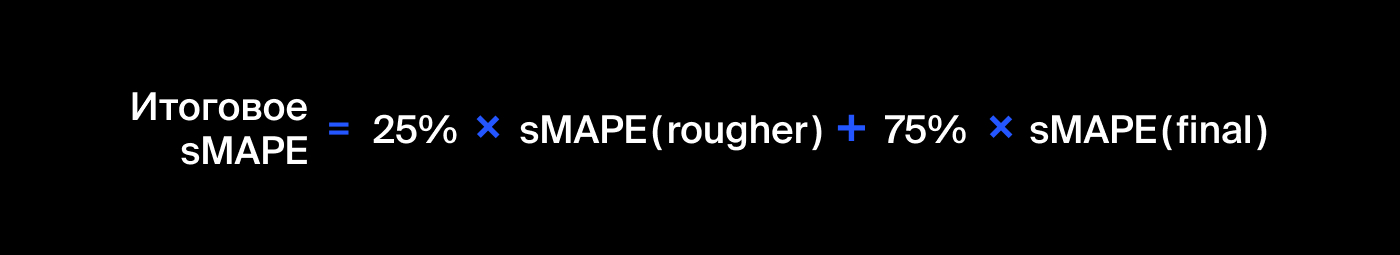

In [ ]:
def final_smape_calculate(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']

    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]

    return 0.25 * smape_calculate(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * smape_calculate(target_actual_rougher, target_predictions_rougher)

## Сравнение моделей.

Зададим оставшиеся параметры и оценим качество моделей на тренировочной выборке. Раз речь у нас идёт о cимметричной средней абсолютной процентной ошибке, чем результат меньше, тем лучше.

Фиксируем параметр random_state с помощью отдельной переменной.

In [ ]:
RND_ST = np.random.RandomState(12345)

Создаём scorer c параметром greater_is_better=False

In [ ]:
scorer_smape = make_scorer(final_smape_calculate, greater_is_better=False)

Создаём модель линейнай регрессия.

In [ ]:
model = LinearRegression()
smape = cross_val_score(
    model, features_train, target_train, cv=5, scoring=scorer_smape
).mean()
print(f"Лучшее значение sMAPE для линейной регрессии: {-smape}")


Создаём модель дерева решений.

In [ ]:
param_grid = {"max_depth": range(1, 13)}

model = DecisionTreeRegressor(random_state=RND_ST)
search = GridSearchCV(model, param_grid, cv=5, scoring=scorer_smape)
search.fit(features_train, target_train)
print(
    f"Лучшее значение sMAPE для дерева решений: {-search.best_score_} при значениях гиперпараметров: {search.best_params_}"
)

Создаём модель случайного леса.

In [ ]:
param_grid = {"n_estimators": range(10, 51, 10), "max_depth": range(1, 13, 2)}

model = RandomForestRegressor(random_state=RND_ST)
search = GridSearchCV(model, param_grid, cv=5, scoring=scorer_smape, n_jobs=-1)
search.fit(features_train, target_train)
print(
    f"Лучшее значение sMAPE для случайного леса: {-search.best_score_} при значениях гиперпараметров: {search.best_params_}"
)

Лучше всех себя показала модель случайного леса с максимальной глубиной дерева 11 и количеством деревьев 50. Её и выберем для проверки на тестовых данных.

## Проверка выбранной модели на тестовых данных.

Запускаем случайный лес с выбраннами параметрами на тестовой выборке.

In [ ]:
model = RandomForestRegressor(max_depth=11, n_estimators=50, random_state=RND_ST, n_jobs=-1)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print(f'sMAPE для тестовых данных: {final_smape_calculate(target_test, predictions_test)}')

Для определения адекватности полученного значения модели сравним её с константной моделью.

In [ ]:
dmr_median = DummyRegressor(strategy="median")

dmr_median.fit(features_train, target_train)
predictions_dummy = dmr_median.predict(features_test)
print(f'sMAPE для константной модели: {final_smape_calculate(target_test, predictions_dummy)}')

Значение константной модели закономерно выше, чем у выбранной.

## Выводы.
 - Все модели были обучены на тренировочной выборке, на основе их предсказаний было посчитано значение sMAPE.
 - Лучше всех себя показала модель случайного леса, обеспечивашая при предсказании целевых признаков значение sMAPE 6.37.
 - На тестовой выборке случайный лес предсказал значения целевых признаков с sMAPE 8.11.
 - Посчитано значение sMAPE для контстантной модели, оно равняентся 8.52. Таким образом, качество выбранной модели обосновано.